# Part 6.4 - Analysis Topic Model of Regions
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import sys, gc
sys.path.insert(0, '../utils')
from utils import filter_topics, plot_topics, plot_wordcloud, plot_avg
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
sns.axes_style("darkgrid")
%matplotlib inline

import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2019-02-04 12:03:23


**In this part, we will use the topic modeling result from part 6.1 to analyze the topics of different regions.** 

**To evaluate and compare the distribution of topics, we use two basic metrics, in practice we use both to find interesting topics:**
1. The dominant topic counts. 

    Every document has a dominant topic represent the most portion of its contents. By summing the number of each dominant topic in a range of time, we see the variety and trend of each topic over time. It is easy to understand and fit for scatter plot, but in this way it ignores  non-dominant topics.

1. The average weight of topics over time.

    This metric is the average weight of a topic through all documents in a range of time, it avoid the issue above, reflect the topic variety and trend over time. However, it might give a frequent/normal topic (which has a small weight in each document) a high weight because the topic appears in large number of documents, when sum all weights of each topic and divid by total weight of all topics, this normal topic may get a high weight.
    

**To visualize the topics, we use below plots:**

1. word cloud to display topic words.

1. Point plot to display the average topic weight over time.

## 1 Load Data

**Load the processed dataframes:**
* `topicKeys.txt`: topic words list
* `domTopic.csv`: document dominant topics dataframe
* `avgWeight.csv`: average topic weight dataframe

### 1.1 Otago

**Topics List:**

In [2]:
path = r'../models/otago/topicKeys.csv'

df_topics_otago = (pd.read_csv(path, 
                               header=None, 
                               index_col=None, 
                               names = ['topic_', 'weight_', 'keywords_'],
                               encoding='utf8')
                   .sort_values(by='topic_')
                   .reset_index(drop=True))

topics_shape = df_topics_otago.shape

In [3]:
print('Shape of dataframe:', topics_shape)
df_topics_otago.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.001620,train railway leave trains station passengers return dep day tickets service stations express run railways fares spe...
1,1,0.004835,prices advertisements column suit latest ladies suits made street quality goods good wear style special styles fit c...
2,2,0.003975,time good year made great present work years fact number past season week large make place success doubt interest ago
3,3,0.002506,plaintiff defendant claim court costs judgment case witness evidence paid amount pay appeared gave made plaintiffs c...
4,4,0.005796,found death body deceased man inquest dead named evidence witness died suicide morning murder wife returned house ve...


**Docmument - dominant topics dataframe:**

In [4]:
path = r'../models/otago/domTopics.csv'

df_domtopic_otago = pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                                dtype={2:'str'},
                                encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_otago['keywords'] = df_domtopic_otago['keywords_'].str.slice(0,60)+'...'
df_domtopic_otago.drop("keywords_", axis=1, inplace=True)

In [5]:
print('Shape of dataframe:', df_domtopic_otago.shape)
df_domtopic_otago.sample(5)

Shape of dataframe: (374495, 6)


,id,region,year,topic,weight,keywords
304206,32612482,Otago,1912,154,0.218922,pills liver stomach blood health system indigestion nervous ...
294749,32515349,Otago,1910,74,0.248434,act person regulations made time persons law paid provisions...
274682,24018787,Otago,1893,21,0.207645,public time present question people great fact matter good m...
135528,7579851,Otago,1903,121,0.350959,man don't good time day asked boy young it's i'm back make p...
184029,10434085,Otago,1890,101,0.288519,years london great man english time england made ago year li...


**Average topic weight dataframe:**

In [6]:
path = r'../models/otago/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_otago, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_otago = df_avgweight

df_topics_otago.columns = ['topic', 'weight', 'keywords']

In [7]:
print('Shape of dataframe:', df_avgweight_otago.shape)
df_avgweight_otago.sample(5)

Shape of dataframe: (15800, 4)


,year,topic,weight,keywords
4183,1871,183,0.002138,feilding palmerston north wellington foxton manawatu manches...
5497,1878,97,0.002985,cases case tons bags casks bales boxes sacks packages pkgs k...
3785,1869,185,0.000835,daily monday tuesday saturday leave thursday wednesday frida...
34,1851,34,0.000087,rooms price section large bungalow terms modern deposit home...
2969,1865,169,0.001490,school college pupils miss classes wellington street music t...


### 1.2 Canterbury

**Topics List:**

In [8]:
path = r'../models/canterbury/topicKeys.csv'

df_topics_canterbury = (pd.read_csv(path, 
                                    header=None, 
                                    index_col=None, 
                                    names = ['topic_', 'weight_', 'keywords_'],
                                    encoding='utf8')
                        .sort_values(by='topic_')
                        .reset_index(drop=True))

In [9]:
print('Shape of dataframe:', df_topics_canterbury.shape)
df_topics_canterbury.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.001213,train railway leave trains station passengers return dep day tickets service stations express run railways fares spe...
1,1,0.003899,prices advertisements column suit latest ladies suits made street quality goods good wear style special styles fit c...
2,2,0.006865,time good year made great present work years fact number past season week large make place success doubt interest ago
3,3,0.001718,plaintiff defendant claim court costs judgment case witness evidence paid amount pay appeared gave made plaintiffs c...
4,4,0.004419,found death body deceased man inquest dead named evidence witness died suicide morning murder wife returned house ve...


**Docmument - dominant topics dataframe:**

In [10]:
path = r'../models/canterbury/domTopics.csv'

df_domtopic_canterbury = pd.read_csv(path, 
                                     header=None, 
                                     index_col=None, 
                                     names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                                     dtype={2:'str'},
                                     encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_canterbury['keywords'] = df_domtopic_canterbury['keywords_'].str.slice(0,60)+'...'
df_domtopic_canterbury.drop("keywords_", axis=1, inplace=True)

In [11]:
print('Shape of dataframe:', df_domtopic_canterbury.shape)
df_domtopic_canterbury.sample(5)

Shape of dataframe: (282791, 6)


,id,region,year,topic,weight,keywords
27553,4095285,Canterbury,1869,98,0.096082,business public notice begs attention orders inform premises...
12056,2386162,Canterbury,1862,94,0.150340,time people day men crowd night morning hour o'clock made gr...
162820,14295193,Canterbury,1915,33,0.245160,tin ill oil lit mil day zealand ton tie hat aro fur aid tins...
260461,27285511,Canterbury,1941,21,0.261791,public time present question people great fact matter good m...
253684,27247279,Canterbury,1935,101,0.271268,years london great man english time england made ago year li...


**Average topic weight dataframe:**

In [12]:
path = r'../models/canterbury/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_canterbury, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_canterbury = df_avgweight

df_topics_canterbury.columns = ['topic', 'weight', 'keywords']

In [13]:
print('Shape of dataframe:', df_avgweight_otago.shape)
df_avgweight_otago.sample(5)

Shape of dataframe: (15800, 4)


,year,topic,weight,keywords
1170,1856,170,0.004345,gas power oil water electric light engine machine made feet ...
7890,1890,90,0.011522,crops crop good soil wheat farmers time land season year gro...
5023,1876,23,0.001044,loving memory dear inserted mother passed memoriam father di...
1569,1858,169,0.001732,school college pupils miss classes wellington street music t...
1198,1856,198,0.000702,strike union men miners labour work workers coal federation ...


### 1.3 Manawatu-Wanganui

**Topics List:**

In [14]:
path = r'../models/manawatu-wanganui/topicKeys.csv'

df_topics_mw = (pd.read_csv(path, 
                            header=None, 
                            index_col=None, 
                            names = ['topic_', 'weight_', 'keywords_'],
                            encoding='utf8')
                .sort_values(by='topic_')
                .reset_index(drop=True))

In [15]:
print('Shape of dataframe:', topics_shape)
df_topics_mw.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.001110,train railway leave trains station passengers return dep day tickets service stations express run railways fares spe...
1,1,0.003953,prices advertisements column suit latest ladies suits made street quality goods good wear style special styles fit c...
2,2,0.007612,time good year made great present work years fact number past season week large make place success doubt interest ago
3,3,0.001502,plaintiff defendant claim court costs judgment case witness evidence paid amount pay appeared gave made plaintiffs c...
4,4,0.004054,found death body deceased man inquest dead named evidence witness died suicide morning murder wife returned house ve...


**Docmument - dominant topics dataframe:**

In [16]:
path = r'../models/manawatu-wanganui/domTopics.csv'

df_domtopic_mw = pd.read_csv(path, 
                             header=None, 
                             index_col=None, 
                             names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                             dtype={2:'str'},
                             encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_mw['keywords'] = df_domtopic_mw['keywords_'].str.slice(0,60)+'...'
df_domtopic_mw.drop("keywords_", axis=1, inplace=True)

In [17]:
print('Shape of dataframe:', df_domtopic_mw.shape)
df_domtopic_mw.sample(5)

Shape of dataframe: (344669, 6)


,id,region,year,topic,weight,keywords
323301,26372692,Manawatu-Wanganui,1918,21,0.216708,public time present question people great fact matter good m...
318678,26344788,Manawatu-Wanganui,1918,101,0.322569,years london great man english time england made ago year li...
11437,2660105,Manawatu-Wanganui,1879,101,0.197554,years london great man english time england made ago year li...
213569,23806873,Manawatu-Wanganui,1920,102,0.356343,hospital medical disease health cases patients treatment cas...
121095,11289704,Manawatu-Wanganui,1895,154,0.149173,pills liver stomach blood health system indigestion nervous ...


**Average topic weight dataframe:**

In [18]:
path = r'../models/manawatu-wanganui/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_mw, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_mw = df_avgweight

df_topics_mw.columns = ['topic', 'weight', 'keywords']

In [19]:
print('Shape of dataframe:', df_avgweight_mw.shape)
df_avgweight_mw.sample(5)

Shape of dataframe: (10200, 4)


,year,topic,weight,keywords
8768,1913,168,0.003268,dunedin invercargill lawrence southland gore balclutha milto...
5084,1892,84,0.010338,letter sir editor public paper matter made statement time le...
8100,1910,100,0.003193,sale stock goods prices cash reduced price great bargains ad...
4645,1890,45,0.007014,fruit trees plants apples garden varieties seeds flower flow...
8700,1913,100,0.002998,sale stock goods prices cash reduced price great bargains ad...


### 1.4 Wellington

**Topics List:**

In [20]:
path = r'../models/wellington/topicKeys.csv'

df_topics_wellington = (pd.read_csv(path, 
                                    header=None, 
                                    index_col=None, 
                                    names = ['topic_', 'weight_', 'keywords_'],
                                    encoding='utf8')
                        .sort_values(by='topic_')
                        .reset_index(drop=True))

In [21]:
print('Shape of dataframe:', df_topics_wellington.shape)
df_topics_wellington.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.001899,train railway leave trains station passengers return dep day tickets service stations express run railways fares spe...
1,1,0.002968,prices advertisements column suit latest ladies suits made street quality goods good wear style special styles fit c...
2,2,0.005969,time good year made great present work years fact number past season week large make place success doubt interest ago
3,3,0.001660,plaintiff defendant claim court costs judgment case witness evidence paid amount pay appeared gave made plaintiffs c...
4,4,0.004656,found death body deceased man inquest dead named evidence witness died suicide morning murder wife returned house ve...


**Docmument - dominant topics dataframe:**

In [22]:
path = r'../models/wellington/domTopics.csv'

df_domtopic_wellington = pd.read_csv(path, 
                                     header=None, 
                                     index_col=None, 
                                     names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                                     dtype={2:'str'},
                                     encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_wellington['keywords'] = df_domtopic_wellington['keywords_'].str.slice(0,60)+'...'
df_domtopic_wellington.drop("keywords_", axis=1, inplace=True)

In [23]:
print('Shape of dataframe:', df_domtopic_wellington.shape)
df_domtopic_wellington.sample(5)

Shape of dataframe: (634731, 6)


,id,region,year,topic,weight,keywords
242888,17961349,Wellington,1928,132,0.362389,sydney south australia melbourne australian wales new_zealan...
288430,18251882,Wellington,1913,101,0.189427,years london great man english time england made ago year li...
324727,18506553,Wellington,1921,84,0.302524,letter sir editor public paper matter made statement time le...
568563,29262968,Wellington,1903,101,0.252842,years london great man english time england made ago year li...
483923,19655913,Wellington,1932,38,0.130054,miss song evening audience concert programme part music band...


**Average topic weight dataframe:**

In [24]:
path = r'../models/wellington/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_wellington, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_wellington = df_avgweight

df_topics_wellington.columns = ['topic', 'weight', 'keywords']

In [25]:
print('Shape of dataframe:', df_avgweight_wellington.shape)
df_avgweight_wellington.sample(5)

Shape of dataframe: (20600, 4)


,year,topic,weight,keywords
10184,1890,184,0.007867,police killed arrested received london men shot prisoners wo...
16846,1927,46,0.002996,wheat oats flour market potatoes ton prices barley produce b...
7261,1876,61,0.007851,professor found made time great years earth water sun proces...
3294,1855,94,0.003135,time people day men crowd night morning hour o'clock made gr...
9965,1889,165,0.006788,oamaru aro thames dunedin otago north waitaki john street ze...


## 2 The Most Distinct Documents

**First of all, check the document with the highest weight topic through all documents, which means the document contains the fewest topics, easy to check the topic by eyes. Most this kind of documents are oversimplified, but it is a simple way to check topics. Here we print the top one of them.**

### 2.1 Otago

In [26]:
df_domtopic_otago.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
151902,8573573,Otago,1887,146,0.902443,bill house amendment council committee act government passed...
231882,12873492,Otago,1900,101,0.776589,years london great man english time england made ago year li...
99664,5789069,Otago,1878,40,0.741378,government provincial province council colony general superi...


In [27]:
id_ = df_domtopic_otago.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

8573573

In [28]:
%%bash -s $id_

echo 'Print 2000 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 2000 characters of document id: 8573573
766132:8573573	Page 5 Advertisements Column 3	A. & T. IITCrLIS. A. &; T. INGLIS A. & T. INGLIS A. & T, INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T, INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIB A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS A. & T. INGLIS | A. & T. INGLIS ! A. & T. INGLIS 

### 2.2 Canterbury

In [29]:
df_domtopic_canterbury.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
131681,13132910,Canterbury,1912,6,0.883373,motor masterton street car cycle phone cars prices advertise...
171766,14627830,Canterbury,1915,186,0.860249,iron machinery machines engines machine steam ploughs made p...
189657,15277930,Canterbury,1916,186,0.858633,iron machinery machines engines machine steam ploughs made p...


In [30]:
id_ = df_domtopic_canterbury.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

13132910

In [31]:
%%bash -s $id_

echo 'Print 2000 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 2000 characters of document id: 13132910
1205964:13132910	SUN.	"SUN.Oct. 19 Oct. 20 Oct. 21 ... Oct. 22 Oct. 23 Oct. 24 ... • Oct 25 Oct. 26 ... Oct. 27 Oct. 28 ... Oct. 29 Oct. 30 ... Oct. 31 ... ... 5.5 ... 6.26 • •• 5.3 ;.. 6.28 ■ •• 5.1 ... 6.29 • ■• 5.0 ... 6.3* ... 4.58 ... 6.31 \" ... 4.56 ... 6.33 ... 4.55 ... 6.34. ... 4.53 ... 6.3S ... 4.52 y ... 6.3ft ... 4.51 ... 6.3a . ■ ... 4.49 ... 6.39 - 4.48 ... 6.40 ' ••• 4.47 ... 6.4^"


### 2.3 Manawatu-Wanganui

In [32]:
df_domtopic_mw.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
308135,26281561,Manawatu-Wanganui,1916,101,0.801296,years london great man english time england made ago year li...
260077,25990170,Manawatu-Wanganui,1910,101,0.763314,years london great man english time england made ago year li...
300666,26236974,Manawatu-Wanganui,1915,101,0.746940,years london great man english time england made ago year li...


In [33]:
id_ = df_domtopic_mw.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

26281561

In [34]:
%%bash -s $id_

echo 'Print 2000 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 2000 characters of document id: 26281561
2487060:26281561	PHASES OF THE MOON.	PHASES OF THE MOON.. DECEMBER. D. H. M.. First Quarter ... 2 032 p.m. Vull Moon ... ... 30 0 20 a.m. Last Quarter IS 5 43 a.in. New Moon, 25 0 8 a.m. First Quarter _~... 61 11 44 p.m. Apogee— lid. 7h. 44min. a.m. , Perigef—26d. llh. 42tinn.


### 2.4 Wellington

In [35]:
df_domtopic_wellington.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
260118,18071996,Wellington,1926,89,0.974556,god people world man great men life christian day christ spi...
262440,18086539,Wellington,1926,89,0.966767,god people world man great men life christian day christ spi...
352974,18686184,Wellington,1894,57,0.790169,meeting evening yesterday held wellington morning night mess...


In [36]:
id_ = df_domtopic_canterbury.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

13132910

In [37]:
%%bash -s $id_

echo 'Print 2000 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 2000 characters of document id: 13132910
1205964:13132910	SUN.	"SUN.Oct. 19 Oct. 20 Oct. 21 ... Oct. 22 Oct. 23 Oct. 24 ... • Oct 25 Oct. 26 ... Oct. 27 Oct. 28 ... Oct. 29 Oct. 30 ... Oct. 31 ... ... 5.5 ... 6.26 • •• 5.3 ;.. 6.28 ■ •• 5.1 ... 6.29 • ■• 5.0 ... 6.3* ... 4.58 ... 6.31 \" ... 4.56 ... 6.33 ... 4.55 ... 6.34. ... 4.53 ... 6.3S ... 4.52 y ... 6.3ft ... 4.51 ... 6.3a . ■ ... 4.49 ... 6.39 - 4.48 ... 6.40 ' ••• 4.47 ... 6.4^"


## 3 Word Cloud

**Since MALLET outputs topic keywords without weight of each keywords, so we will add sequential weight (like arithmetic progression) for each keywords, which means the weight of each keywords is not accurate, but for word cloud it is acceptable. Below plot shows the highest weight 4 topics in topics list of each region.**

#### 3.1 Otago

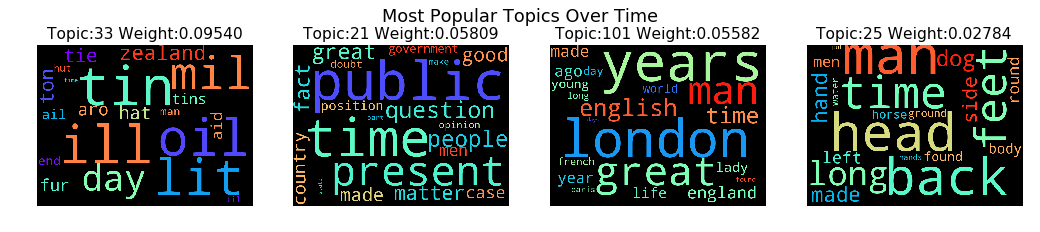

In [38]:
df_plt = df_topics_otago.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, adjust_top=0.8)

#### 3.2 Canterbury

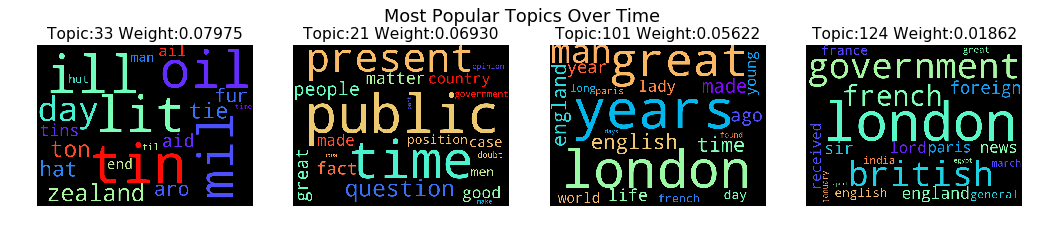

In [39]:
df_plt = df_topics_canterbury.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, adjust_top=0.8)

#### 3.3 Manawatu-Wanganui

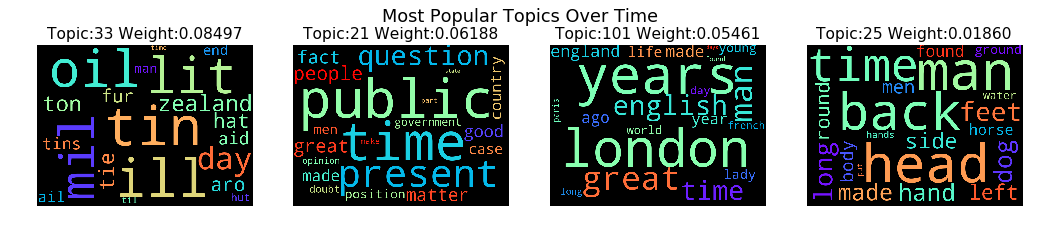

In [40]:
df_plt = df_topics_mw.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, adjust_top=0.8)

#### 3.4 Wellington

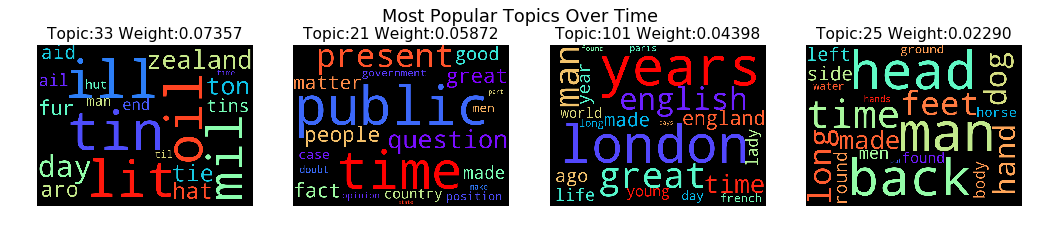

In [41]:
df_plt = df_topics_wellington.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, adjust_top=0.8)

## 4 The Most Significant Topics of Each Region

**Variance dose not consider the document number, if a topic has high variance but the support documents are few, the topic is not significant. To find significant, we use the figure that dominant topic count multiply the average weight of the topic, this figure considers both the number of support document and the average weight of topic. This way magnifies the topics that are dominant topics of documents, we take it as significant topics.**

### 4.1 Otago

In [42]:
df_domtopic_count = (df_domtopic_otago.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_otago.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Otago:', topic_list)

df_plt_avg = filter_topics(df_avgweight_otago, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_otago, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Otago: [33, 21, 101, 25, 57, 124, 37, 84, 161, 40]
Shape of df_plt_avg: (316, 4)


,weight,keywords
topic,,
33,0.095401,tin ill oil lit mil day zealand ton tie hat aro fur aid tins ail end man hut til time
21,0.058095,public time present question people great fact matter good made country case men position government doubt opinion m...
101,0.055821,years london great man english time england made ago year life lady young world day french long paris found days
25,0.027837,man head back time feet long dog hand made side left round men body found horse ground water hands put
57,0.017646,meeting evening yesterday held wellington morning night messrs saturday auckland made district number to-day board c...
124,0.019542,london government british french foreign sir england news lord paris received france english general india march gre...
37,0.018483,love day life heart thy eyes light long night sweet home great world sun thou beautiful bright man sea beauty
84,0.013350,letter sir editor public paper matter made statement time letters times question published issue correspondent fact ...
161,0.018003,powder chemist medicines sold medical remedy hair bottle medicine chemists pills london teeth oil powders prepared c...


**Average topic weight by year:**

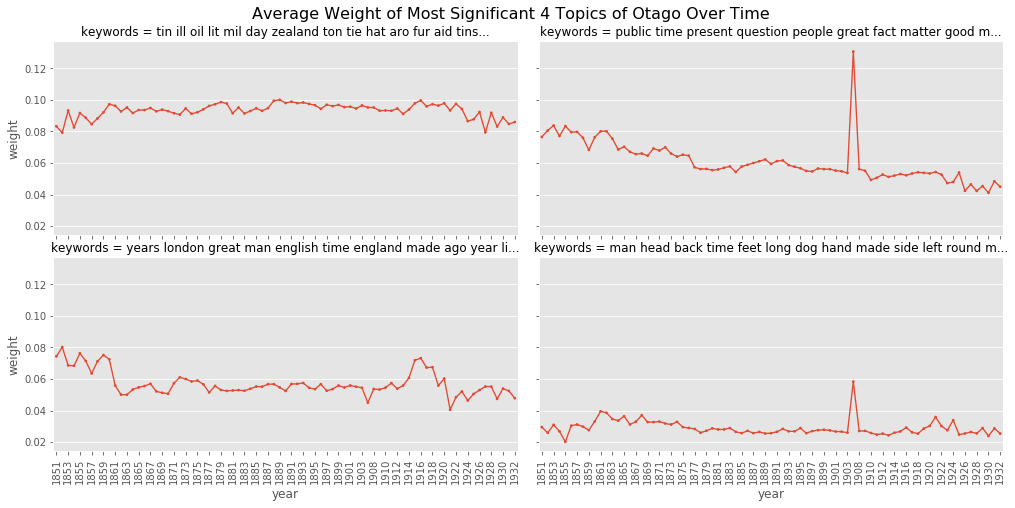

In [43]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Otago Over Time',
            height=3.5,
            col_wrap=2)

### 4.2 Canterbury

In [44]:
df_domtopic_count = (df_domtopic_canterbury.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_canterbury.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Canterbury:', topic_list)

df_plt_avg = filter_topics(df_avgweight_canterbury, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_canterbury, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Canterbury: [21, 33, 101, 43, 124, 25, 181, 89, 61, 57]
Shape of df_plt_avg: (356, 4)


,weight,keywords
topic,,
21,0.069296,public time present question people great fact matter good made country case men position government doubt opinion m...
33,0.079748,tin ill oil lit mil day zealand ton tie hat aro fur aid tins ail end man hut til time
101,0.056225,years london great man english time england made ago year life lady young world day french long paris found days
43,0.014687,life man men people great work world good time years social make things country fact mind power human knowledge modern
124,0.018621,london government british french foreign sir england news lord paris received france english general india march gre...
25,0.015724,man head back time feet long dog hand made side left round men body found horse ground water hands put
181,0.010448,miles river island country lake expedition water found party north south sea great coast feet land mountain made wes...
89,0.013184,god people world man great men life christian day christ spirit religion power nation faith lord war time history true
61,0.012447,professor found made time great years earth water sun process scientific science form light experiments air discover...


**Average topic weight by year:**

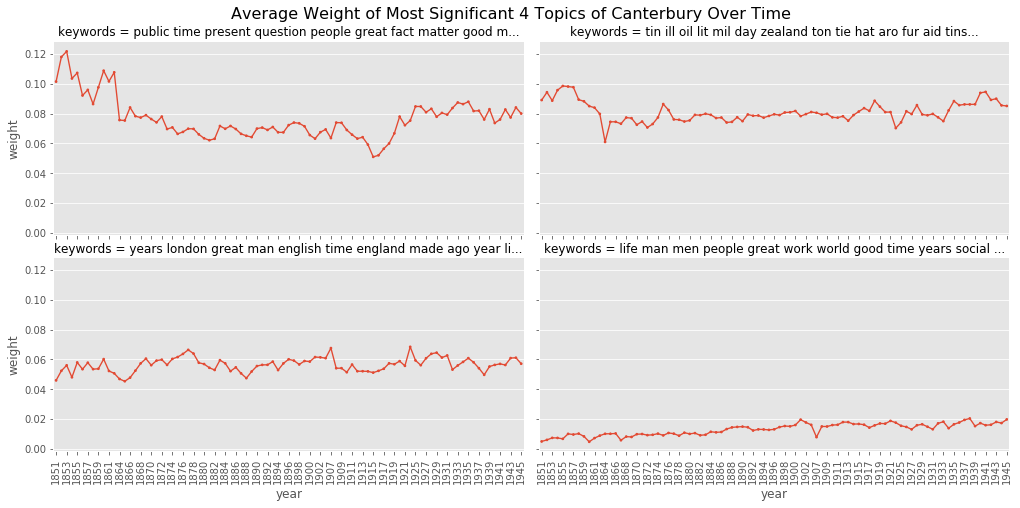

In [45]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Canterbury Over Time',
            height=3.5,
            col_wrap=2)

### 4.3 Manawatu-Wanganui

In [46]:
df_domtopic_count = (df_domtopic_mw.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_mw.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Manawatu-Wanganui:', topic_list)

df_plt_avg = filter_topics(df_avgweight_mw, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_mw, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Manawatu-Wanganui: [33, 21, 101, 25, 37, 89, 124, 57, 43, 161]
Shape of df_plt_avg: (204, 4)


,weight,keywords
topic,,
33,0.084970,tin ill oil lit mil day zealand ton tie hat aro fur aid tins ail end man hut til time
21,0.061876,public time present question people great fact matter good made country case men position government doubt opinion m...
101,0.054615,years london great man english time england made ago year life lady young world day french long paris found days
25,0.018596,man head back time feet long dog hand made side left round men body found horse ground water hands put
37,0.016526,love day life heart thy eyes light long night sweet home great world sun thou beautiful bright man sea beauty
89,0.011759,god people world man great men life christian day christ spirit religion power nation faith lord war time history true
124,0.015340,london government british french foreign sir england news lord paris received france english general india march gre...
57,0.015058,meeting evening yesterday held wellington morning night messrs saturday auckland made district number to-day board c...
43,0.011627,life man men people great work world good time years social make things country fact mind power human knowledge modern


**Average topic weight by year:**

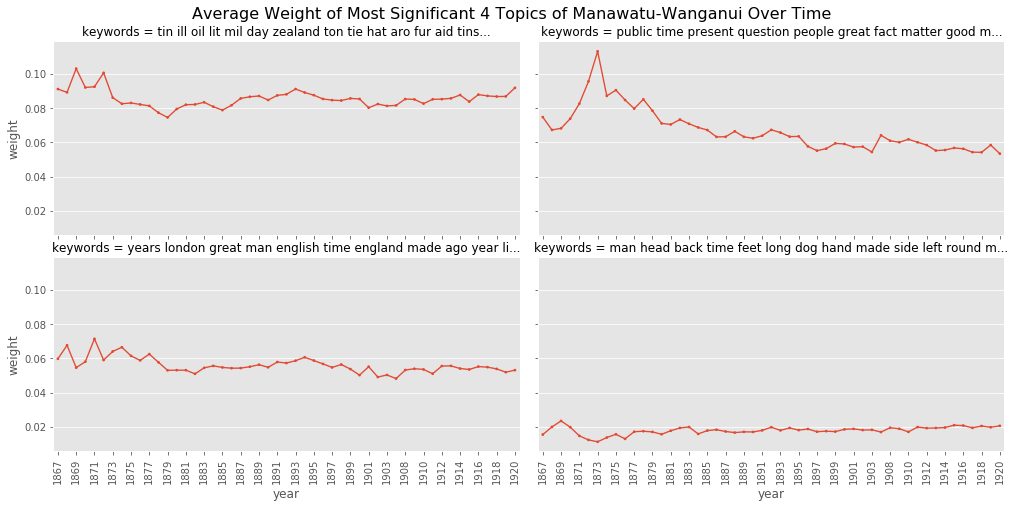

In [47]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Manawatu-Wanganui Over Time',
            height=3.5,
            col_wrap=2)

### 4.4 Wellington

In [48]:
df_domtopic_count = (df_domtopic_wellington.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_wellington.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Wellington:', topic_list)

df_plt_avg = filter_topics(df_avgweight_wellington, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_wellington, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Wellington: [21, 33, 101, 25, 37, 89, 43, 57, 121, 61]
Shape of df_plt_avg: (412, 4)


,weight,keywords
topic,,
21,0.058723,public time present question people great fact matter good made country case men position government doubt opinion m...
33,0.073569,tin ill oil lit mil day zealand ton tie hat aro fur aid tins ail end man hut til time
101,0.043983,years london great man english time england made ago year life lady young world day french long paris found days
25,0.022905,man head back time feet long dog hand made side left round men body found horse ground water hands put
37,0.017802,love day life heart thy eyes light long night sweet home great world sun thou beautiful bright man sea beauty
89,0.017809,god people world man great men life christian day christ spirit religion power nation faith lord war time history true
43,0.013269,life man men people great work world good time years social make things country fact mind power human knowledge modern
57,0.014996,meeting evening yesterday held wellington morning night messrs saturday auckland made district number to-day board c...
121,0.012825,man don't good time day asked boy young it's i'm back make put told replied sir home thing give didn't


**Average topic weight by year:**

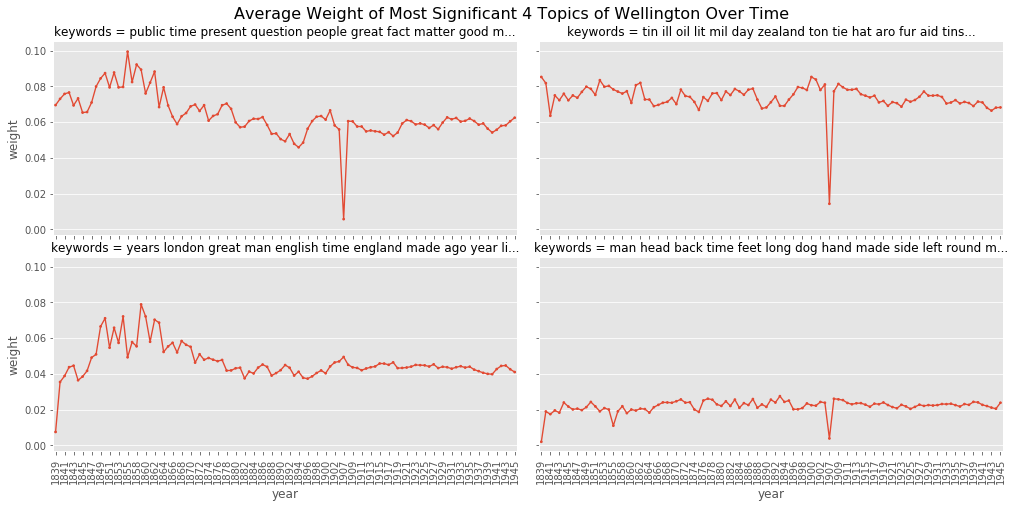

In [49]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Wellington Over Time',
            height=3.5,
            col_wrap=2)

## 5 Differet Topics from Other Regions

**By compare the topic weight in topic list, we can find out which topics are the most different in the regions. Here we are interested in both trend (the more or less popular topics) in the region.**

### 5.1 Otago

In [50]:
path = r'../models/otago/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_otago)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_otago, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_otago, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [77, 29, 20, 175, 59, 179, 137, 69, 71, 139]
Shape of df_plt_avg: (790, 4)


,weight,keywords
topic,,
77,0.001726,association press received telegraph copyright london united july electric cable june sydney august april march aust...
29,0.001000,mails mail close office letters auckland notices united_kingdom chief wellington post late europe london due fee con...
20,0.000563,auckland wellington left due london lyttelton october sydney december march january september february sailed novemb...
175,0.001075,wool market london new_zealand sales prices bales cent mutton wheat good australian demand firm beef sold received c...
59,0.001424,wellington nelson morning to-morrow arrived saturday tons westport moon picton leaves coast wednesday to-day monday ...
179,0.001121,weather rain wind winds moderate hours strong barometer light heavy to-day cape gale forecast breeze sea south fine ...
137,0.000481,wellington auckland private canterbury christchurch dunedin otago wanganui new_zealand napier nelson north reported ...
69,0.002108,german enemy germans front french british london fighting troops attack captured received line artillery russian sta...
71,0.000791,air flying flight london aeroplane british aircraft machine miles bombs aeroplanes force enemy raid japanese machine...


**Average topic weight by year:**

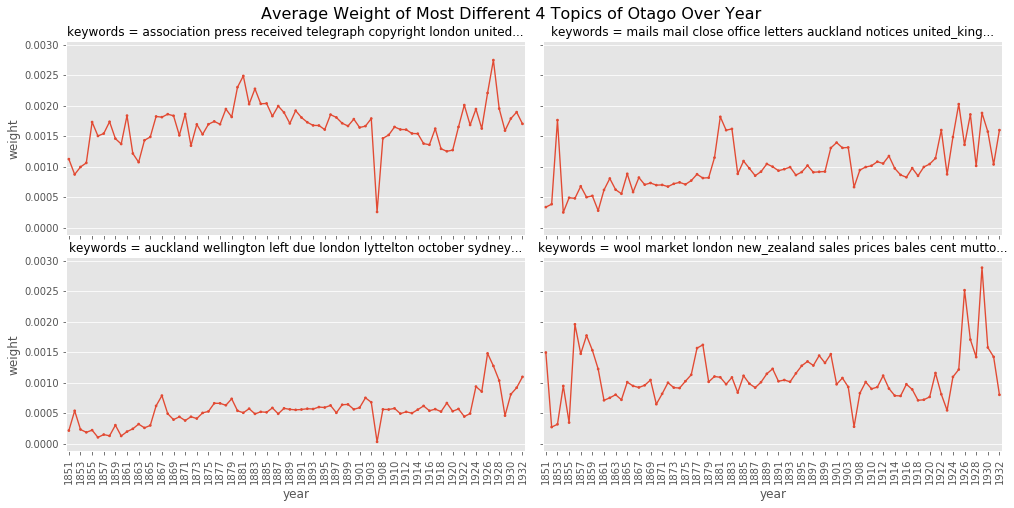

In [51]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Otago Over Year',
            height=3.5,
            col_wrap=2)

### 5.2 Canterbury

In [52]:
path = r'../models/canterbury/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_canterbury)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_canterbury, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_canterbury, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [20, 59, 77, 29, 69, 41, 128, 175, 42, 23]
Shape of df_plt_avg: (890, 4)


,weight,keywords
topic,,
20,0.000514,auckland wellington left due london lyttelton october sydney december march january september february sailed novemb...
59,0.001198,wellington nelson morning to-morrow arrived saturday tons westport moon picton leaves coast wednesday to-day monday ...
77,0.002552,association press received telegraph copyright london united july electric cable june sydney august april march aust...
29,0.001192,mails mail close office letters auckland notices united_kingdom chief wellington post late europe london due fee con...
69,0.001702,german enemy germans front french british london fighting troops attack captured received line artillery russian sta...
41,0.001024,team game play match football played ball goal good rugby forwards points saturday players wellington teams ground s...
128,0.001065,beat club played play game match tennis won championship round players tournament games golf bowling skip green cup ...
175,0.001776,wool market london new_zealand sales prices bales cent mutton wheat good australian demand firm beef sold received c...
42,0.001434,naval ships british navy fleet german sea vessels submarine admiral war admiralty ship london tons guns sunk submari...


**Average topic weight by year:**

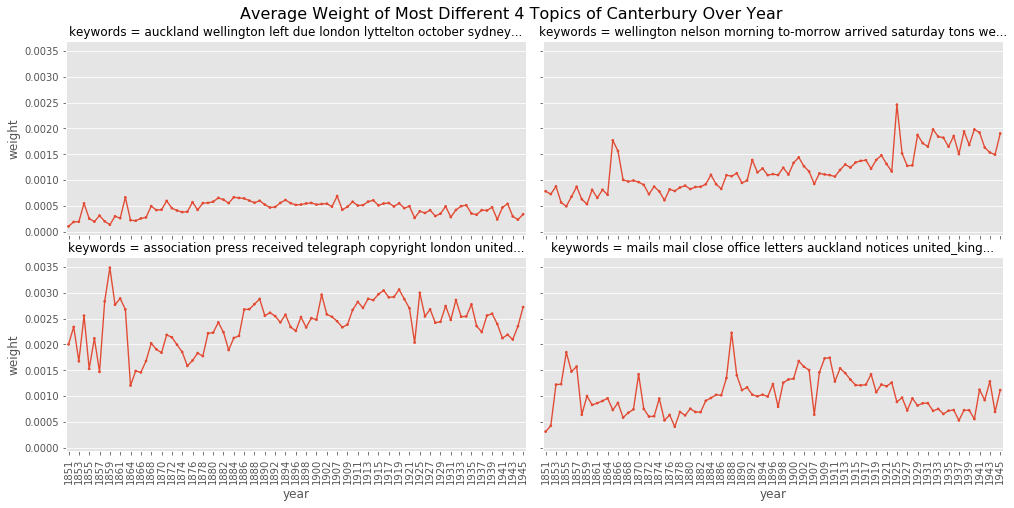

In [53]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Canterbury Over Year',
            height=3.5,
            col_wrap=2)

### 5.3 Manawatu-Wanganui

In [54]:
path = r'../models/manawatu-wanganui/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_mw)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_mw, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_mw, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [29, 59, 139, 20, 179, 23, 77, 69, 79, 163]
Shape of df_plt_avg: (510, 4)


,weight,keywords
topic,,
29,0.000841,mails mail close office letters auckland notices united_kingdom chief wellington post late europe london due fee con...
59,0.000913,wellington nelson morning to-morrow arrived saturday tons westport moon picton leaves coast wednesday to-day monday ...
139,0.000441,sellers buyers stock bank sales new_zealand national exchange pref auckland waihi wellington insurance cent share or...
20,0.000494,auckland wellington left due london lyttelton october sydney december march january september february sailed novemb...
179,0.001016,weather rain wind winds moderate hours strong barometer light heavy to-day cape gale forecast breeze sea south fine ...
23,0.000312,loving memory dear inserted mother passed memoriam father died family brother wife sister son bereavement life sad s...
77,0.003170,association press received telegraph copyright london united july electric cable june sydney august april march aust...
69,0.002148,german enemy germans front french british london fighting troops attack captured received line artillery russian sta...
79,0.001791,association meeting conference union wellington new_zealand committee council auckland decided held members league d...


**Average topic weight by year:**

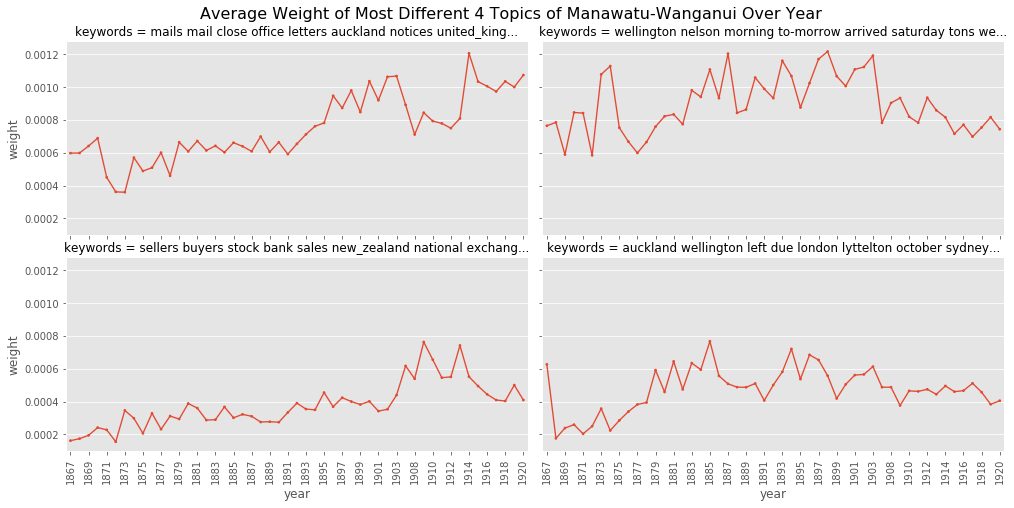

In [55]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Manawatu-Wanganui Over Year',
            height=3.5,
            col_wrap=2)

### 5.4 Wellington

In [56]:
path = r'../models/wellington/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_wellington)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_wellington, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_wellington, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [77, 69, 59, 29, 127, 179, 20, 79, 133, 49]
Shape of df_plt_avg: (1030, 4)


,weight,keywords
topic,,
77,0.002539,association press received telegraph copyright london united july electric cable june sydney august april march aust...
69,0.001757,german enemy germans front french british london fighting troops attack captured received line artillery russian sta...
59,0.001852,wellington nelson morning to-morrow arrived saturday tons westport moon picton leaves coast wednesday to-day monday ...
29,0.001998,mails mail close office letters auckland notices united_kingdom chief wellington post late europe london due fee con...
127,0.002288,arrived tons port wellington sailed auckland schooner cargo yesterday melbourne left barque passengers lyttelton syd...
179,0.001234,weather rain wind winds moderate hours strong barometer light heavy to-day cape gale forecast breeze sea south fine ...
20,0.000785,auckland wellington left due london lyttelton october sydney december march january september february sailed novemb...
79,0.002132,association meeting conference union wellington new_zealand committee council auckland decided held members league d...
133,0.000744,acres good land sheep price acre miles house freehold farm grass property terms balance paddocks cattle watered room...


**Average topic weight by year:**

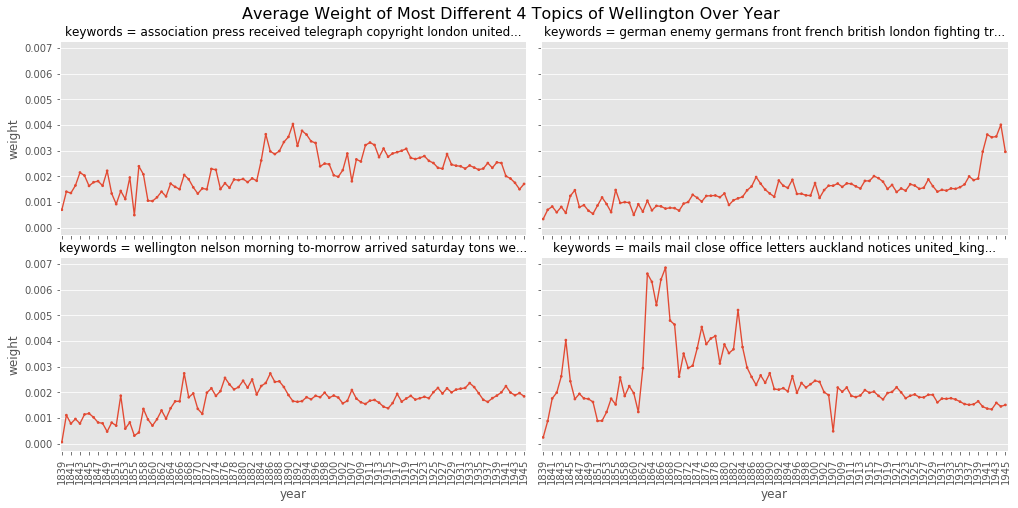

In [57]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Wellington Over Year',
            height=3.5,
            col_wrap=2)

## 6 Different Topics Among The Regions

**Now we compare the different among the regions: Otago, Canterbury, Manawatu-Wanganui and Wellington. We calculate the STD of each topic (STD of 4 topics weight value for each topic), and list the sorted value. Here we plot top 10 most different topics among the regions.** 

In [58]:
df_topics_otago.drop(columns='keywords', inplace=True)
df_topics_otago.columns = ['topic', 'weight_otago']
df_topics_canterbury.drop(columns='keywords', inplace=True)
df_topics_canterbury.columns = ['topic', 'weight_canterbury']
df_topics_mw.drop(columns='keywords', inplace=True)
df_topics_mw.columns = ['topic', 'weight_mw']
df_topics_wellington.columns = ['topic', 'weight_wellington', 'keywords']


df_topics = (df_topics_otago
             .merge(df_topics_canterbury, on='topic')
             .merge(df_topics_mw, on='topic')
             .merge(df_topics_wellington, on='topic'))

scaler = MinMaxScaler()
df_topics_scaled = pd.DataFrame(scaler.fit_transform(df_topics[df_topics.columns[1:5]]),
                                columns = df_topics.columns[1:5])
df_topics_scaled.index.name = 'topic'

df_topics_scaled['std'] = df_topics_scaled.std(axis=1)

df_topics['std'] = df_topics_scaled['std']

df_topics = df_topics.sort_values(by='std', ascending=False)

topic_list = list(df_topics['topic'][:10])

print('List of topics to plot:', topic_list)

df_topics = filter_topics(df_topics, topic_list).set_index('topic')
df_topics = df_topics.loc[topic_list]

df_topics.head(10)

List of topics to plot: [21, 98, 89, 45, 25, 101, 161, 52, 61, 165]


,weight_otago,weight_canterbury,weight_mw,weight_wellington,keywords,std
topic,,,,,,
21,0.058095,0.069296,0.061876,0.058723,public time present question people great fact matter good made country case men position government doubt opinion m...,0.111050
98,0.008354,0.017624,0.008360,0.006139,business public notice begs attention orders inform premises patronage general support stock undersigned advertiseme...,0.065687
89,0.009815,0.013184,0.011759,0.017809,god people world man great men life christian day christ spirit religion power nation faith lord war time history true,0.058584
45,0.006829,0.005032,0.007081,0.013812,fruit trees plants apples garden varieties seeds flower flowers shrubs nursery tree plant planting roses pears choic...,0.057982
25,0.027837,0.015724,0.018596,0.022905,man head back time feet long dog hand made side left round men body found horse ground water hands put,0.055657
101,0.055821,0.056225,0.054615,0.043983,years london great man english time england made ago year life lady young world day french long paris found days,0.054281
161,0.018003,0.008847,0.017576,0.014819,powder chemist medicines sold medical remedy hair bottle medicine chemists pills london teeth oil powders prepared c...,0.045480
52,0.007104,0.006890,0.013267,0.004426,tin tins tea soap sugar jam jars dozen prices large doz lod bottle fruits fruit box finest cash currants lib,0.043365
61,0.007751,0.012447,0.007559,0.011999,professor found made time great years earth water sun process scientific science form light experiments air discover...,0.042381


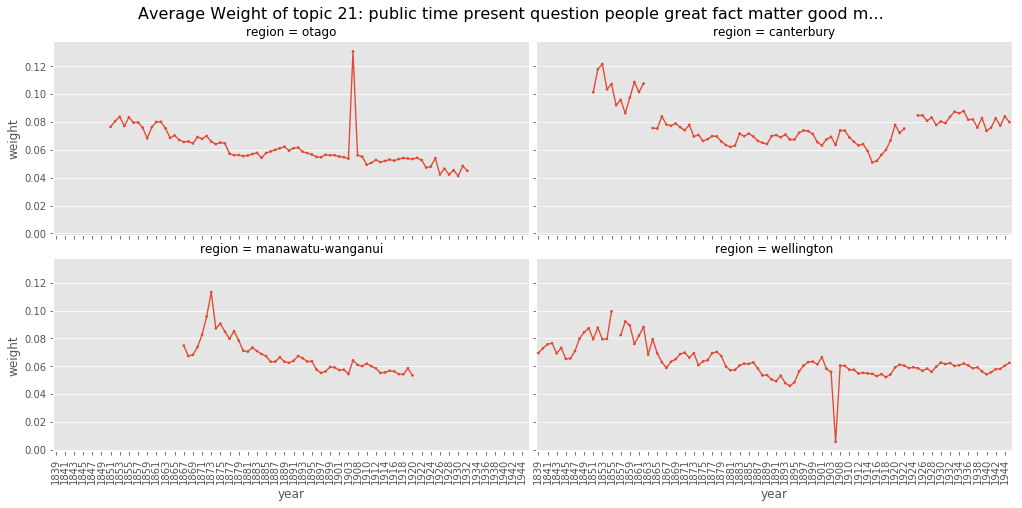

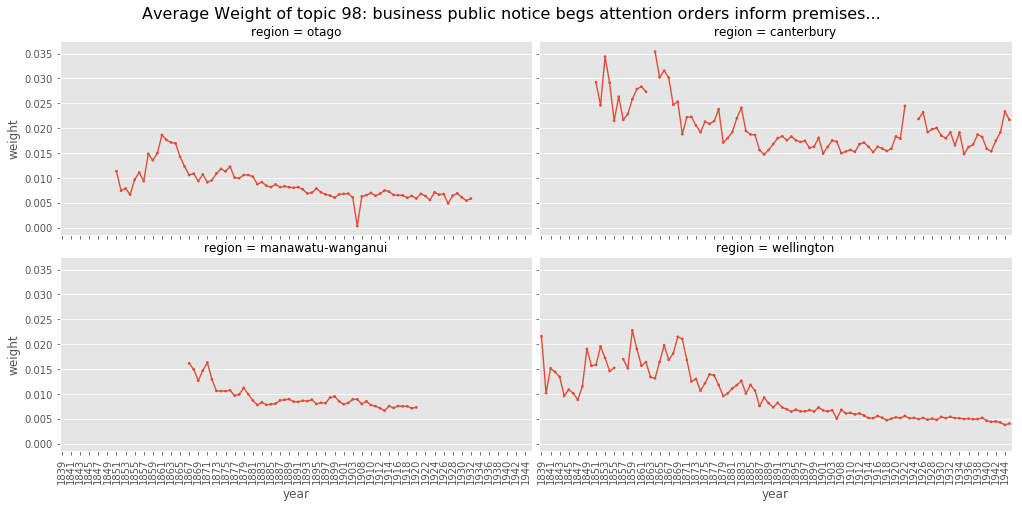

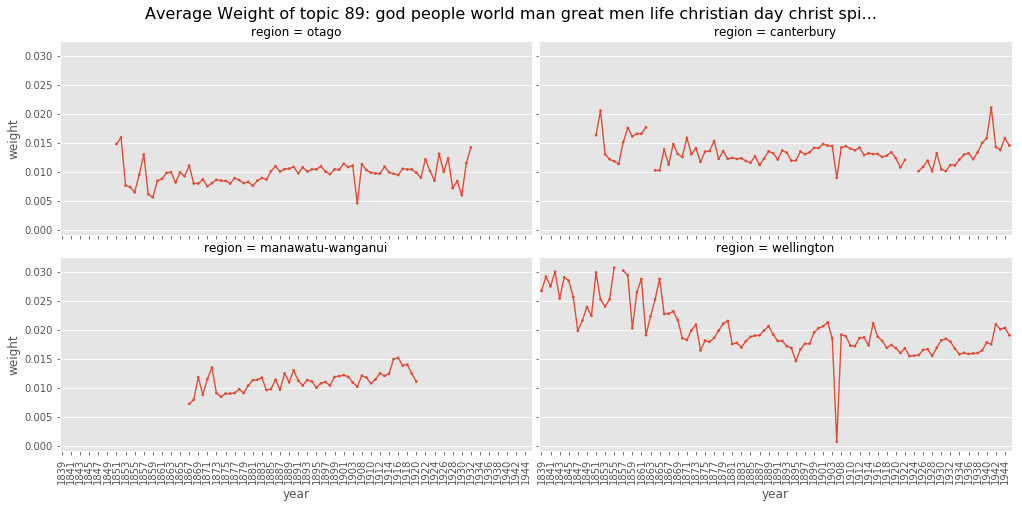

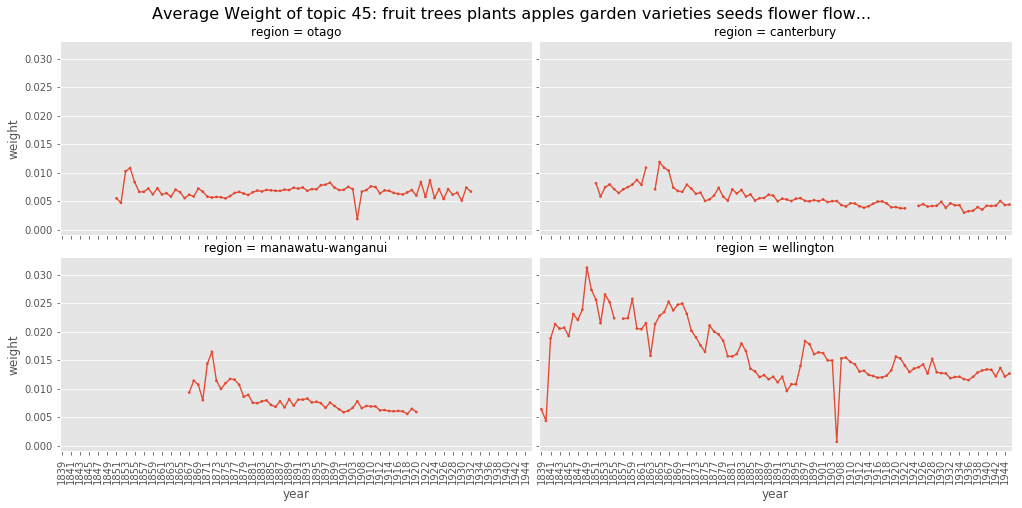

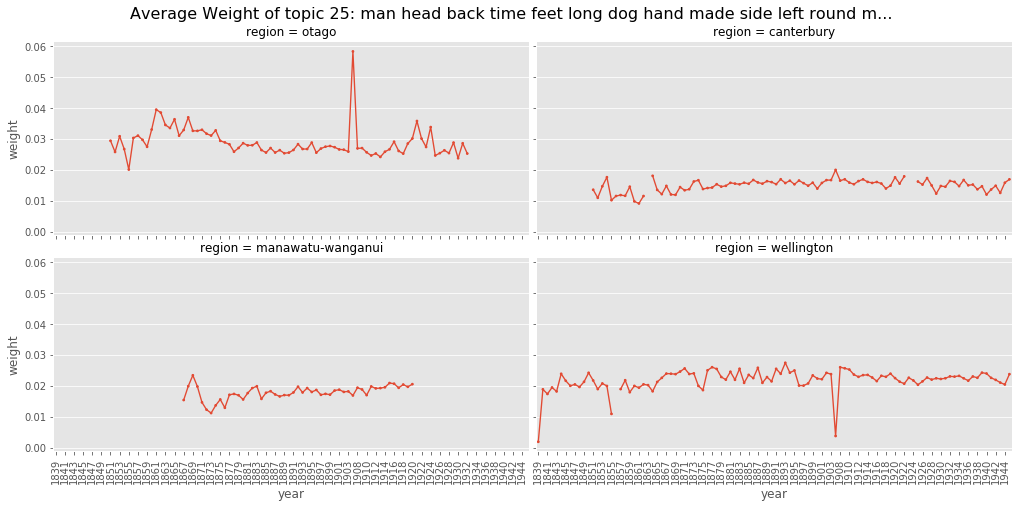

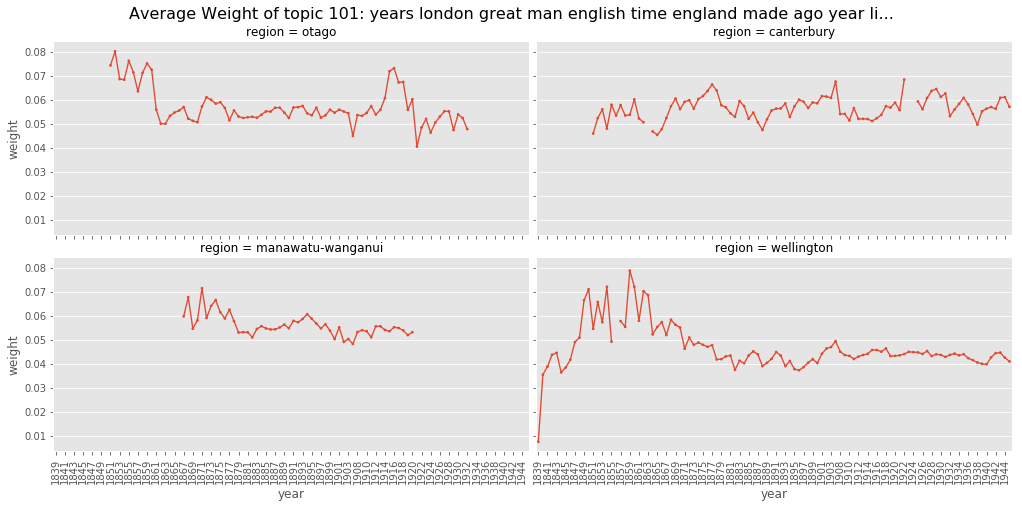

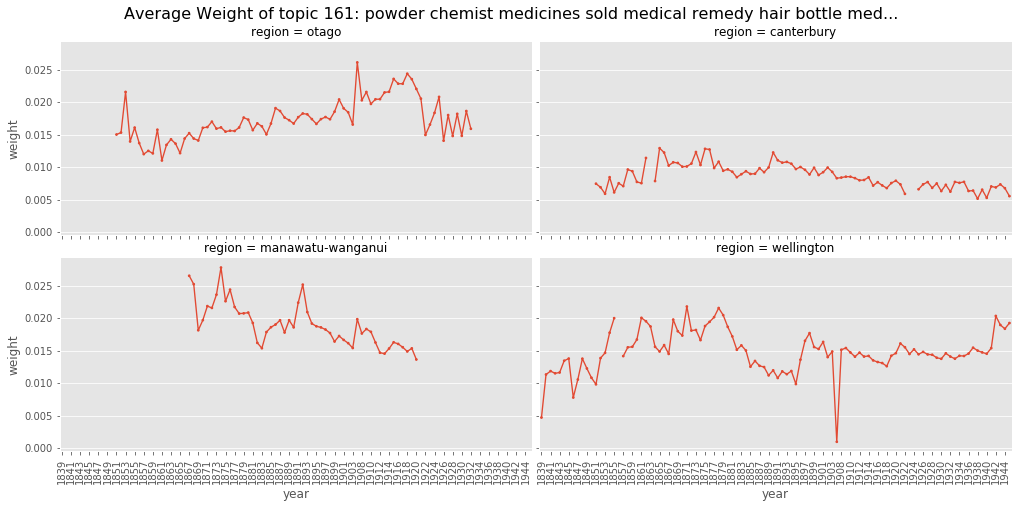

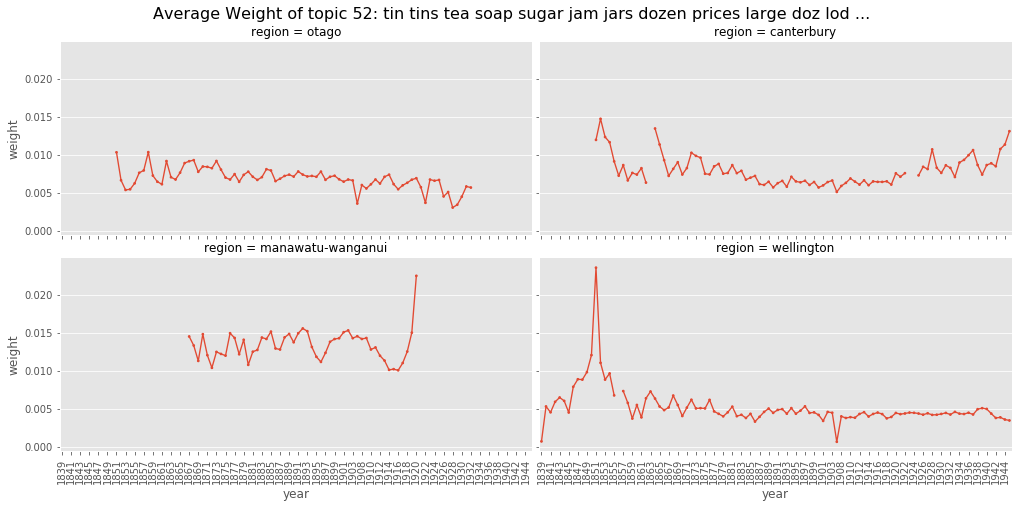

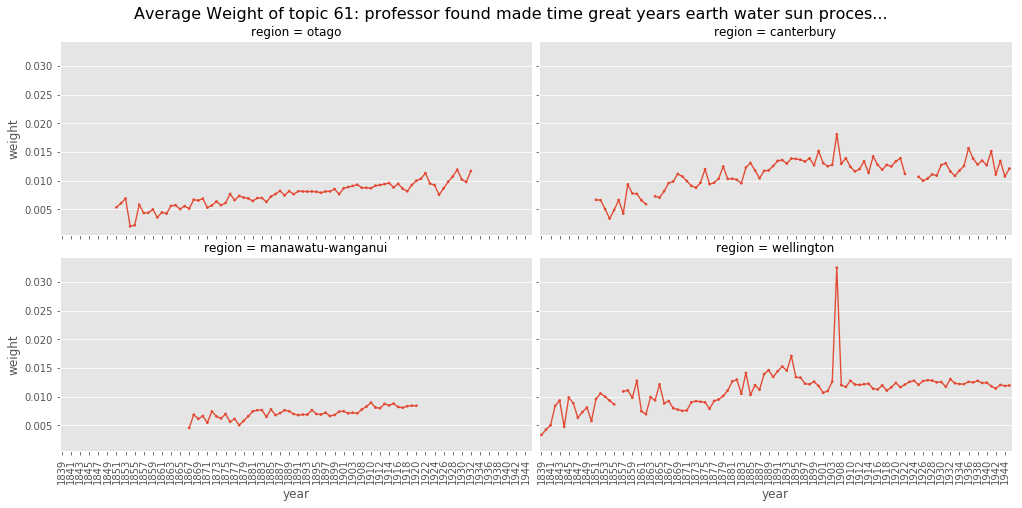

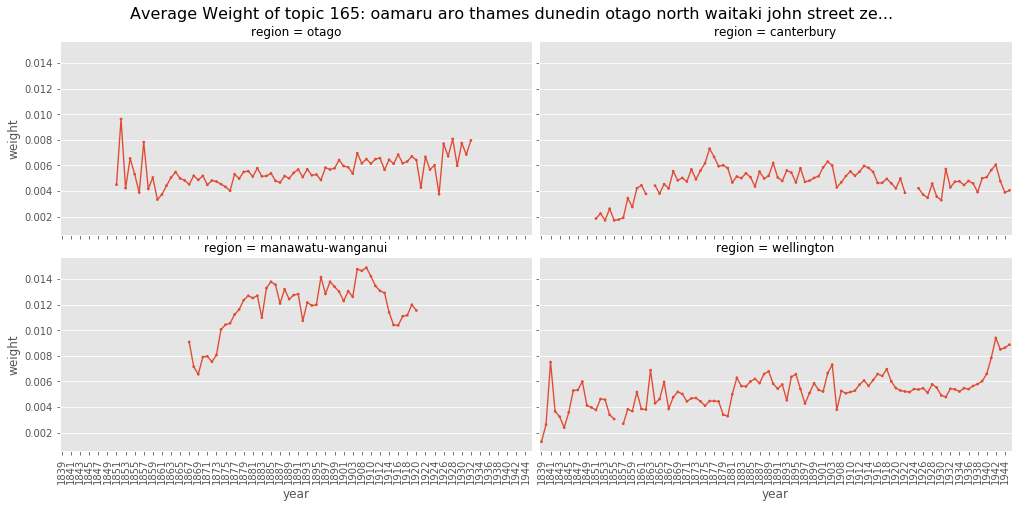

In [59]:
# plot

regions = ['otago', 'canterbury', 'manawatu-wanganui', 'wellington']

for i in range(len(topic_list)):
    df_plt_avg_otago = filter_topics(df_avgweight_otago, [topic_list[i]])
    df_plt_avg_otago['region'] = 'otago'
    df_plt_avg_canterbury = filter_topics(df_avgweight_canterbury, [topic_list[i]])
    df_plt_avg_canterbury['region'] = 'canterbury'
    df_plt_avg_mw = filter_topics(df_avgweight_mw, [topic_list[i]])
    df_plt_avg_mw['region'] = 'manawatu-wanganui'
    df_plt_avg_wellington = filter_topics(df_avgweight_wellington, [topic_list[i]])
    df_plt_avg_wellington['region'] = 'wellington'
    
    df_plt_avg = pd.concat([df_plt_avg_otago, 
                            df_plt_avg_canterbury, 
                            df_plt_avg_mw, 
                            df_plt_avg_wellington])
    
    keywords = (df_plt_avg.keywords.str.slice(0,60)+'...').tolist()[0]
    title = str(topic_list[i])+': '+keywords
    
    plot_topics(df_plt_avg, 
                'region', 
                col_order=regions,
                adjust_top=0.91,
                title=title,
                height=3.5,
                col_wrap=2)

---

In [60]:
gc.collect()

549625